In [1]:
import numpy as np
%matplotlib inline 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from IPython.display import display, Image
import cv2
from PIL import Image
from tqdm import tqdm
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.utils.vis_utils import plot_model
import gc
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
! unzip ../input/low-light-lol/dataset.zip
from os import listdir
from os.path import isfile, join
high = [f for f in listdir('/kaggle/working/our485/high') if isfile(join('/kaggle/working/our485/high/', f))]

from os import listdir
from os.path import isfile, join
low = [f for f in listdir('/kaggle/working/our485/low') if isfile(join('/kaggle/working/our485/low/', f))]

for file in low:
    if (file[-3:] != 'png'):
        low.remove(file)
        
for file in high:
    if (file[-3:] != 'png'):
        high.remove(file)

Archive:  ../input/low-light-lol/dataset.zip
   creating: eval15/
   creating: eval15/high/
  inflating: eval15/high/748.png     
   creating: __MACOSX/
   creating: __MACOSX/eval15/
   creating: __MACOSX/eval15/high/
  inflating: __MACOSX/eval15/high/._748.png  
  inflating: eval15/high/665.png     
  inflating: __MACOSX/eval15/high/._665.png  
  inflating: eval15/high/111.png     
  inflating: __MACOSX/eval15/high/._111.png  
  inflating: eval15/high/493.png     
  inflating: __MACOSX/eval15/high/._493.png  
  inflating: eval15/high/22.png      
  inflating: __MACOSX/eval15/high/._22.png  
  inflating: eval15/high/23.png      
  inflating: __MACOSX/eval15/high/._23.png  
  inflating: eval15/high/669.png     
  inflating: __MACOSX/eval15/high/._669.png  
  inflating: eval15/high/547.png     
  inflating: __MACOSX/eval15/high/._547.png  
  inflating: eval15/high/778.png     
  inflating: __MACOSX/eval15/high/._778.png  
  inflating: eval15/high/55.png      
  inflating: __MACOSX/eval15

  inflating: our485/high/600.png     
  inflating: __MACOSX/our485/high/._600.png  
  inflating: our485/high/614.png     
  inflating: __MACOSX/our485/high/._614.png  
  inflating: our485/high/172.png     
  inflating: __MACOSX/our485/high/._172.png  
  inflating: our485/high/471.png     
  inflating: __MACOSX/our485/high/._471.png  
  inflating: our485/high/129.png     
  inflating: __MACOSX/our485/high/._129.png  
  inflating: our485/high/115.png     
  inflating: __MACOSX/our485/high/._115.png  
  inflating: our485/high/101.png     
  inflating: __MACOSX/our485/high/._101.png  
  inflating: our485/high/667.png     
  inflating: __MACOSX/our485/high/._667.png  
  inflating: our485/high/14.png      
  inflating: __MACOSX/our485/high/._14.png  
  inflating: our485/high/698.png     
  inflating: __MACOSX/our485/high/._698.png  
  inflating: our485/high/28.png      
  inflating: __MACOSX/our485/high/._28.png  
  inflating: our485/high/713.png     
  inflating: __MACOSX/our485/high/._713.

  inflating: __MACOSX/our485/high/._688.png  
  inflating: our485/high/38.png      
  inflating: __MACOSX/our485/high/._38.png  
  inflating: our485/high/139.png     
  inflating: __MACOSX/our485/high/._139.png  
  inflating: our485/high/663.png     
  inflating: __MACOSX/our485/high/._663.png  
  inflating: our485/high/105.png     
  inflating: __MACOSX/our485/high/._105.png  
  inflating: our485/high/677.png     
  inflating: __MACOSX/our485/high/._677.png  
  inflating: our485/high/475.png     
  inflating: __MACOSX/our485/high/._475.png  
  inflating: our485/high/478.png     
  inflating: __MACOSX/our485/high/._478.png  
  inflating: our485/high/450.png     
  inflating: __MACOSX/our485/high/._450.png  
  inflating: our485/high/487.png     
  inflating: __MACOSX/our485/high/._487.png  
  inflating: our485/high/120.png     
  inflating: __MACOSX/our485/high/._120.png  
  inflating: our485/high/646.png     
  inflating: __MACOSX/our485/high/._646.png  
  inflating: our485/high/35.png

  inflating: our485/high/496.png     
  inflating: __MACOSX/our485/high/._496.png  
  inflating: our485/high/482.png     
  inflating: __MACOSX/our485/high/._482.png  
  inflating: our485/high/131.png     
  inflating: __MACOSX/our485/high/._131.png  
  inflating: our485/high/643.png     
  inflating: __MACOSX/our485/high/._643.png  
  inflating: our485/high/125.png     
  inflating: __MACOSX/our485/high/._125.png  
  inflating: our485/high/119.png     
  inflating: __MACOSX/our485/high/._119.png  
  inflating: our485/high/694.png     
  inflating: __MACOSX/our485/high/._694.png  
  inflating: our485/high/680.png     
  inflating: __MACOSX/our485/high/._680.png  
  inflating: our485/high/18.png      
  inflating: __MACOSX/our485/high/._18.png  
  inflating: our485/high/24.png      
  inflating: __MACOSX/our485/high/._24.png  
  inflating: our485/high/723.png     
  inflating: __MACOSX/our485/high/._723.png  
  inflating: our485/high/737.png     
  inflating: __MACOSX/our485/high/._737.

  inflating: our485/high/637.png     
  inflating: __MACOSX/our485/high/._637.png  
  inflating: our485/high/87.png      
  inflating: __MACOSX/our485/high/._87.png  
  inflating: our485/high/93.png      
  inflating: __MACOSX/our485/high/._93.png  
  inflating: our485/high/78.png      
  inflating: __MACOSX/our485/high/._78.png  
  inflating: our485/high/186.png     
  inflating: __MACOSX/our485/high/._186.png  
  inflating: our485/high/44.png      
  inflating: __MACOSX/our485/high/._44.png  
  inflating: our485/high/2.png       
  inflating: __MACOSX/our485/high/._2.png  
  inflating: our485/high/50.png      
  inflating: __MACOSX/our485/high/._50.png  
  inflating: our485/high/757.png     
  inflating: __MACOSX/our485/high/._757.png  
  inflating: our485/high/743.png     
  inflating: __MACOSX/our485/high/._743.png  
  inflating: our485/high/233.png     
  inflating: __MACOSX/our485/high/._233.png  
  inflating: our485/high/555.png     
  inflating: __MACOSX/our485/high/._555.png  

  inflating: our485/low/766.png      
  inflating: __MACOSX/our485/low/._766.png  
  inflating: our485/low/772.png      
  inflating: __MACOSX/our485/low/._772.png  
  inflating: our485/low/75.png       
  inflating: __MACOSX/our485/low/._75.png  
  inflating: our485/low/61.png       
  inflating: __MACOSX/our485/low/._61.png  
  inflating: our485/low/612.png      
  inflating: __MACOSX/our485/low/._612.png  
  inflating: our485/low/174.png      
  inflating: __MACOSX/our485/low/._174.png  
  inflating: our485/low/160.png      
  inflating: __MACOSX/our485/low/._160.png  
  inflating: our485/low/606.png      
  inflating: __MACOSX/our485/low/._606.png  
  inflating: our485/low/616.png      
  inflating: __MACOSX/our485/low/._616.png  
  inflating: our485/low/59.png       
  inflating: __MACOSX/our485/low/._59.png  
  inflating: our485/low/776.png      
  inflating: __MACOSX/our485/low/._776.png  
  inflating: our485/low/762.png      
  inflating: __MACOSX/our485/low/._762.png  
  infla

  inflating: our485/low/477.png      
  inflating: __MACOSX/our485/low/._477.png  
  inflating: our485/low/488.png      
  inflating: __MACOSX/our485/low/._488.png  
  inflating: our485/low/107.png      
  inflating: __MACOSX/our485/low/._107.png  
  inflating: our485/low/661.png      
  inflating: __MACOSX/our485/low/._661.png  
  inflating: our485/low/675.png      
  inflating: __MACOSX/our485/low/._675.png  
  inflating: our485/low/113.png      
  inflating: __MACOSX/our485/low/._113.png  
  inflating: our485/low/649.png      
  inflating: __MACOSX/our485/low/._649.png  
  inflating: our485/low/12.png       
  inflating: __MACOSX/our485/low/._12.png  
  inflating: our485/low/715.png      
  inflating: __MACOSX/our485/low/._715.png  
  inflating: our485/low/701.png      
  inflating: __MACOSX/our485/low/._701.png  
  inflating: our485/low/729.png      
  inflating: __MACOSX/our485/low/._729.png  
  inflating: our485/low/517.png      
  inflating: __MACOSX/our485/low/._517.png  
  inf

  inflating: our485/low/644.png      
  inflating: __MACOSX/our485/low/._644.png  
  inflating: our485/low/122.png      
  inflating: __MACOSX/our485/low/._122.png  
  inflating: our485/low/678.png      
  inflating: __MACOSX/our485/low/._678.png  
  inflating: our485/low/491.png      
  inflating: __MACOSX/our485/low/._491.png  
  inflating: our485/low/485.png      
  inflating: __MACOSX/our485/low/._485.png  
  inflating: our485/low/330.png      
  inflating: __MACOSX/our485/low/._330.png  
  inflating: our485/low/481.png      
  inflating: __MACOSX/our485/low/._481.png  
  inflating: our485/low/495.png      
  inflating: __MACOSX/our485/low/._495.png  
  inflating: our485/low/126.png      
  inflating: __MACOSX/our485/low/._126.png  
  inflating: our485/low/640.png      
  inflating: __MACOSX/our485/low/._640.png  
  inflating: our485/low/654.png      
  inflating: __MACOSX/our485/low/._654.png  
  inflating: our485/low/132.png      
  inflating: __MACOSX/our485/low/._132.png  
  in

  inflating: our485/low/183.png      
  inflating: __MACOSX/our485/low/._183.png  
  inflating: our485/low/69.png       
  inflating: __MACOSX/our485/low/._69.png  
  inflating: our485/low/752.png      
  inflating: __MACOSX/our485/low/._752.png  
  inflating: our485/low/746.png      
  inflating: __MACOSX/our485/low/._746.png  
  inflating: our485/low/785.png      
  inflating: __MACOSX/our485/low/._785.png  
  inflating: our485/low/578.png      
  inflating: __MACOSX/our485/low/._578.png  
  inflating: our485/low/550.png      
  inflating: __MACOSX/our485/low/._550.png  
  inflating: our485/low/236.png      
  inflating: __MACOSX/our485/low/._236.png  
  inflating: our485/low/222.png      
  inflating: __MACOSX/our485/low/._222.png  
  inflating: our485/low/544.png      
  inflating: __MACOSX/our485/low/._544.png  
  inflating: our485/low/593.png      
  inflating: __MACOSX/our485/low/._593.png  
  inflating: our485/low/587.png      
  inflating: __MACOSX/our485/low/._587.png  
  inf

In [3]:
df = pd.DataFrame(high)
high_path = '/kaggle/working/our485/high/'
low_path = '/kaggle/working/our485/low/'
df.columns = ['name']


In [4]:
input_shape= tf.keras.layers.Input(shape = (256, 256, 3))

In [5]:
vgg_original = VGG19(include_top=False, weights='imagenet', input_shape = (256, 256, 3))
vgg_original.trainable = False
vgg_original = Model(inputs=vgg_original.input, outputs=vgg_original.get_layer('block3_conv4').output)

80142336/80134624 [==============================] - 1s 0us/step


In [6]:

def EM(input, kernal_size, channel):
    conv_1 = tf.keras.layers.Conv2D(channel, (3, 3), activation='relu', padding='same', data_format='channels_last')(input)
    conv_2 = tf.keras.layers.Conv2D(channel, (kernal_size, kernal_size), activation='relu', padding='valid', data_format='channels_last')(conv_1)
    conv_3 = tf.keras.layers.Conv2D(channel*2, (kernal_size, kernal_size), activation='relu', padding='valid', data_format='channels_last')(conv_2)
    conv_4 = tf.keras.layers.Conv2D(channel*4, (kernal_size, kernal_size), activation='relu', padding='valid', data_format='channels_last')(conv_3)
    conv_5 = tf.keras.layers.Conv2DTranspose(channel*2, (kernal_size, kernal_size), activation='relu', padding='valid', data_format='channels_last')(conv_4)
    conv_6 = tf.keras.layers.Conv2DTranspose(channel, (kernal_size, kernal_size), activation='relu', padding='valid', data_format='channels_last')(conv_5)
    res = tf.keras.layers.Conv2DTranspose(3, (kernal_size, kernal_size), activation='relu', padding='valid', data_format='channels_last')(conv_6)
    return res


FEM_1 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(input_shape)
FEM_2 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(FEM_1)
FEM_3 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(FEM_2)
FEM_4 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(FEM_3)
FEM_5 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(FEM_4)
FEM_6 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(FEM_5)
FEM_7 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(FEM_6)
FEM_8 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(FEM_7)
FEM_9 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(FEM_8)
FEM_10 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu')(FEM_9)


EM_1 = EM(FEM_1, 5, 8)
EM_2 = EM(FEM_2, 5, 8)
EM_3 = EM(FEM_3, 5, 8)
EM_4 = EM(FEM_4, 5, 8)
EM_5 = EM(FEM_5, 5, 8)
EM_6 = EM(FEM_6, 5, 8)
EM_7 = EM(FEM_7, 5, 8)
EM_8 = EM(FEM_8, 5, 8)
EM_9 = EM(FEM_9, 5, 8)
EM_10 = EM(FEM_10, 5, 8)

## CONCATENATE THE EM_n  LAYERS
EM_combined = tf.keras.layers.Concatenate(axis=3)([EM_1, EM_2, EM_3, EM_4, EM_5, EM_6, EM_7, EM_8, EM_9, EM_10])
## DEFINING OUTPUT
output = tf.keras.layers.Conv2D(3, (1, 1), activation='relu', padding='same', data_format='channels_last')(EM_combined)

model = Model(input_shape, output)



In [7]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        conv2d_1[0][0]                   
____________________________________________________________________________________________

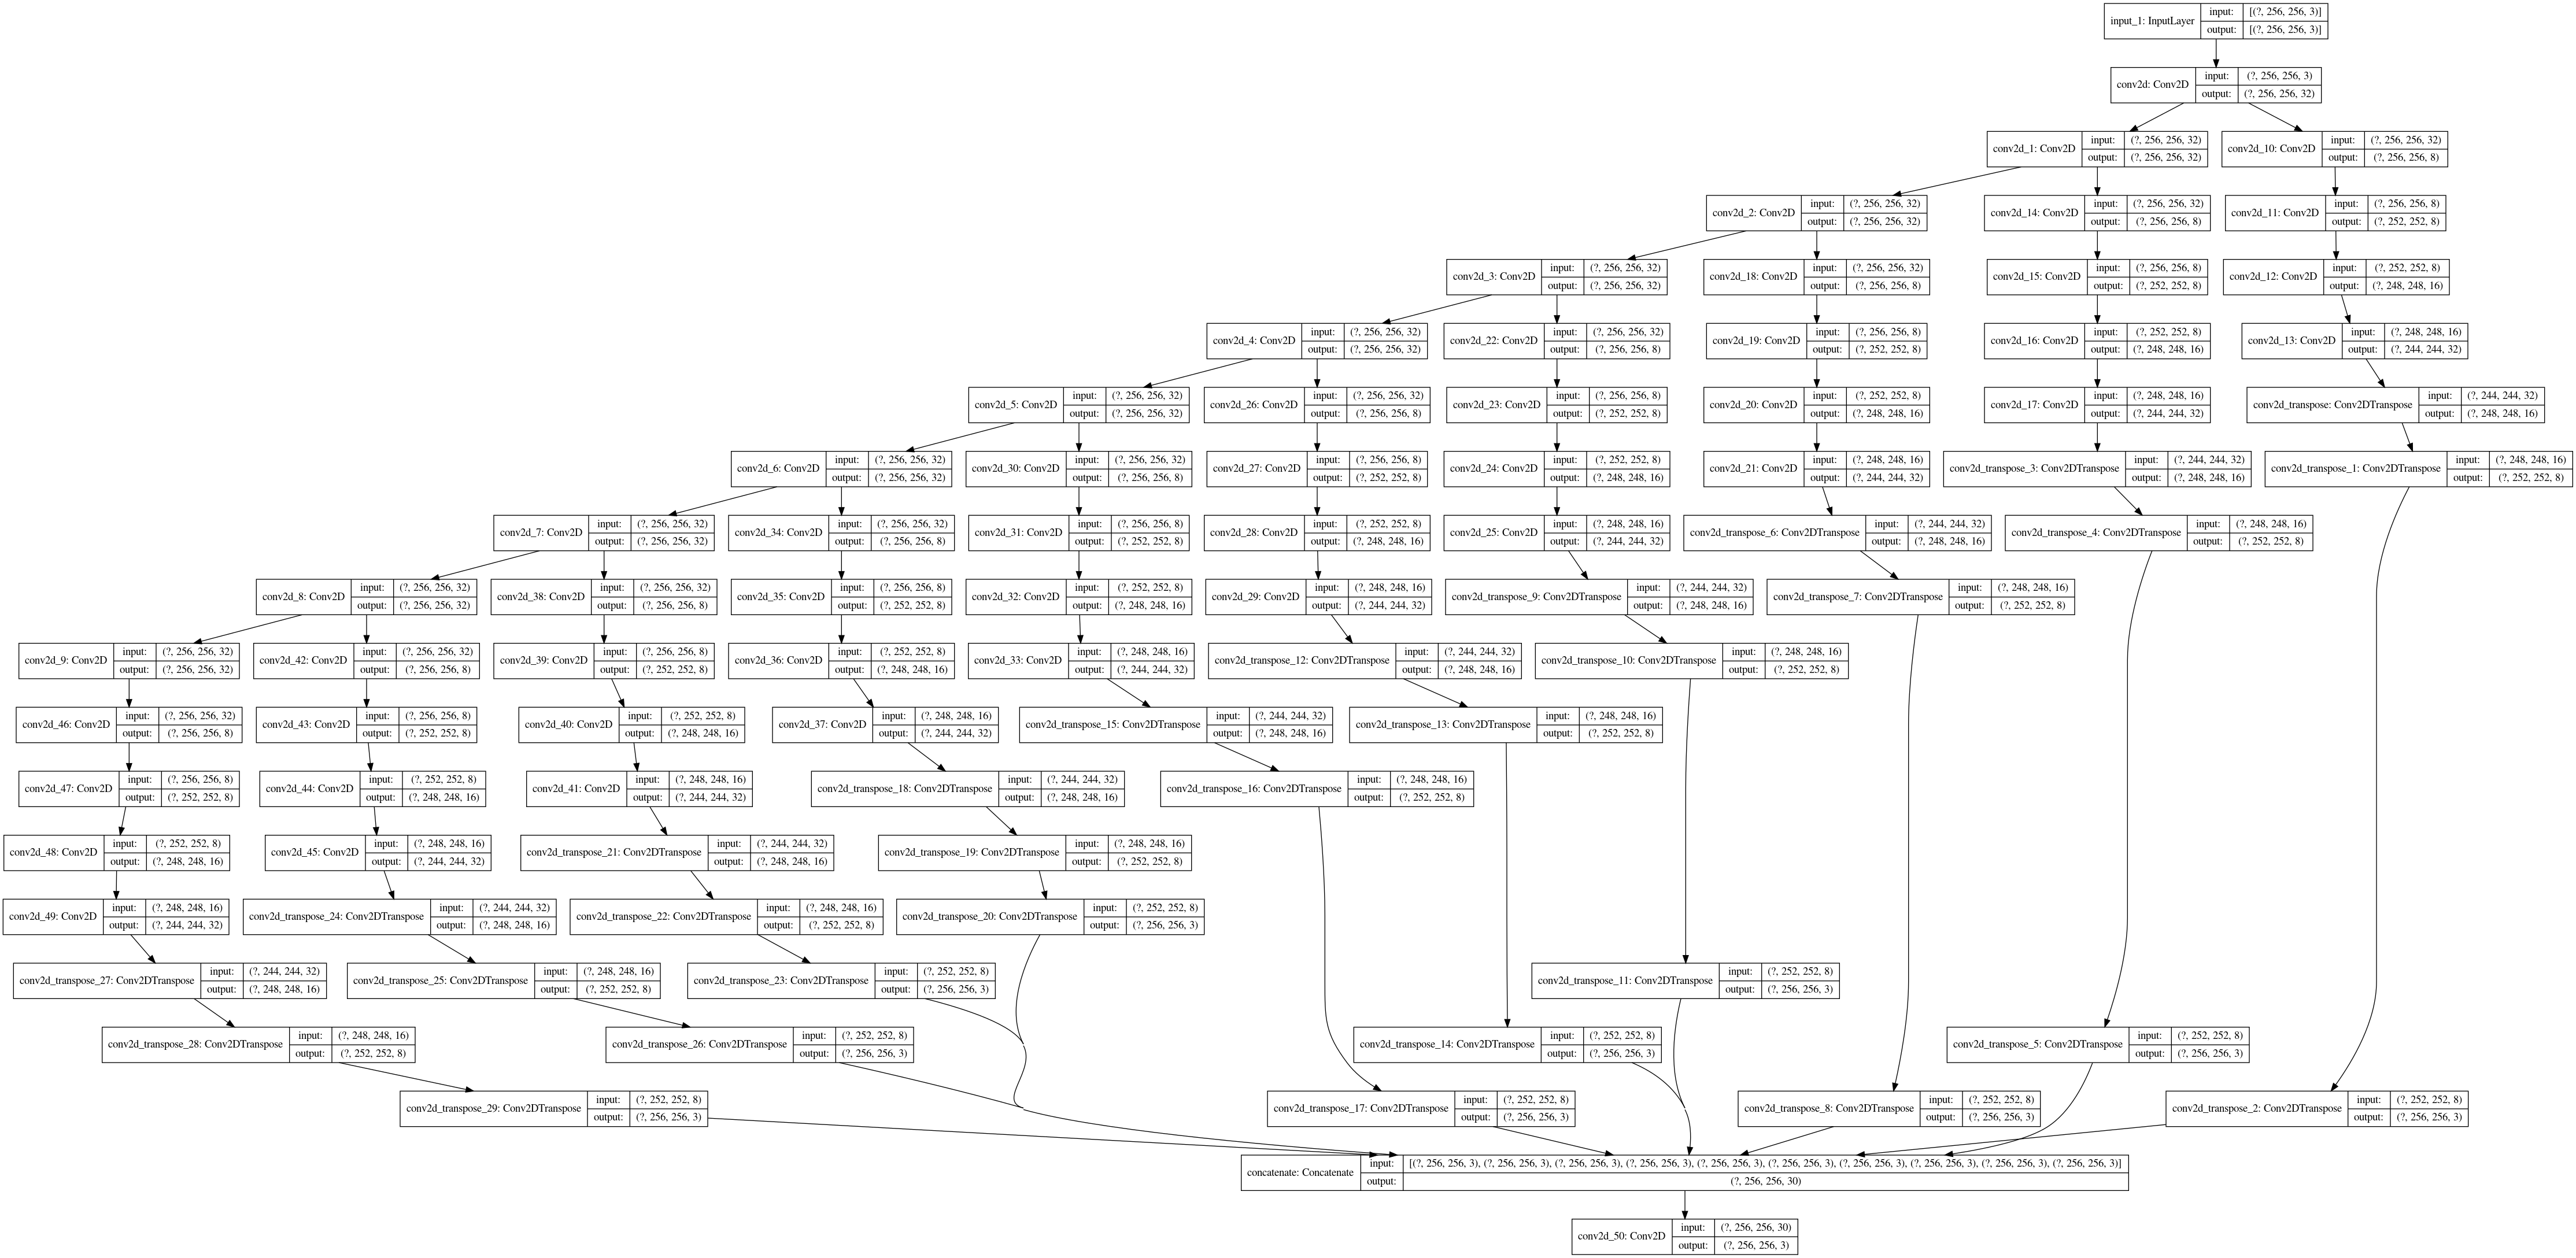

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [32]:
def generator(samples, batch_size=16,shuffle_data=False):
    
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    
    """
    
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        if (shuffle_data):
            shuffle(samples)

        for offset in range(0, num_samples, batch_size):
            batch_samples = samples.iloc[offset:offset+batch_size]

            low_light_em   = []
            high_light_em  = []
            # For each example
            for batch_sample in batch_samples.index:
                
                name = samples.at[batch_sample, 'name']
                
                img_low = Image.open((low_path + name))
                img_low = img_low.resize((256,256), Image.ANTIALIAS)
                img_high = Image.open((high_path + name))
                img_high = img_high.resize((256,256), Image.ANTIALIAS)
                
                low_img = np.array(img_low)
                #print(low_img.shape)
                high_img = np.array(img_high)
                
                low_light_em.append(low_img)
                high_light_em.append(high_img)
                
            low_light = np.array(low_light_em)
            high_light  = np.array(high_light_em)
            
            del img_low
            del img_high
            del low_img
            del high_img
            del low_light_em
            del high_light_em
            
            gc.collect()
            
            yield (low_light, high_light)

In [10]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
train_generator = generator(df_val,batch_size=32,shuffle_data=False)
val_generator = generator(df_train,batch_size=8,shuffle_data=False)

In [12]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


def abs_err(imageA, imageB):
    err = np.sum(np.abs((imageA.astype("float") - imageB.astype("float"))))
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def vgg_loss(y_true, y_pred):
    loss = tf.keras.backend.mean(tf.keras.backend.abs(   (vgg_original(y_true)   -   vgg_original(y_pred)   )))
    
    return loss

def region_loss(y_true, y_pred):
    
    percent = 0.4
    index = int(256 * 256 * percent - 1)
    gray1 = 0.39 * y_pred[:, :, :, 0] + 0.5 * y_pred[:, :, :, 1] + 0.11 * y_pred[:, :, :, 2]
    gray = tf.reshape(gray1, [-1, 256 * 256])
    gray_sort = tf.nn.top_k(-gray, 256 * 256)[0]
    yu = gray_sort[:, index]
    yu = tf.expand_dims(tf.expand_dims(yu, -1), -1)
    mask = tf.cast((gray1 <= yu), dtype=tf.float32)
    mask1 = tf.expand_dims(mask, -1)
    mask = tf.concat([mask1, mask1, mask1], -1)
    low_fake_clean = tf.multiply(mask, y_pred[:, :, :, :3])
    high_fake_clean = tf.multiply(1 - mask, y_pred[:, :, :, :3])
    low_clean = tf.multiply(mask, y_true[:, :, :, :])
    high_clean = tf.multiply(1 - mask, y_true[:, :, :, :])
    loss = tf.keras.backend.mean(tf.keras.backend.abs(low_fake_clean - low_clean) * 4 + tf.keras.backend.abs(high_fake_clean - high_clean))
    
    return loss

def bright_mae(y_true, y_pred):
    return tf.keras.backend.mean(tf.keras.backend.abs(y_pred[:,:,:,:3] - y_true[:,:,:,:3]))

def bright_mse(y_true, y_pred):
    return tf.keras.backend.mean((y_pred[:,:,:,:3] - y_true[:,:,:,:3])**2)

def bright_AB(y_true, y_pred):
            return tf.keras.backend.abs(tf.keras.backend.mean(y_true[:,:,:,:3])-tf.keras.backend.mean(y_pred[:,:,:,:3]))

def log10(x):
    numerator = tf.keras.backend.log(x)
    denominator = tf.keras.backend.log(tf.keras.backend.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def bright_psnr(y_true, y_pred):
    mse = tf.keras.backend.mean((tf.keras.backend.abs(y_pred[:,:,:,:3] - y_true[:,:,:,:3])) ** 2)
    max_num = 1.0
    psnr = 10 * log10(max_num ** 2 / mse)
    return psnr

def bright_SSIM(y_true, y_pred):
    
    ssim = (
          tf.image.ssim(tf.expand_dims(y_pred[:,:,:,0] , -1)    ,  tf.expand_dims(y_true[:,:,:,0] , -1)  ,  max_val = 255)
        + tf.image.ssim(tf.expand_dims(y_pred[:,:,:,1] , -1)    ,  tf.expand_dims(y_true[:,:,:,1] , -1)  ,  max_val = 255)
        + tf.image.ssim(tf.expand_dims(y_pred[:,:,:,2] , -1)    ,  tf.expand_dims(y_true[:,:,:,2] , -1)  ,  max_val = 255)
    )
    
    
    return ssim/3


def structural_loss(y_true, y_pred):
   

    ssim = (
          tf.image.ssim(tf.expand_dims(y_pred[:,:,:,0] , -1)    ,  tf.expand_dims(y_true[:,:,:,0] , -1)  ,  max_val = 255)
        + tf.image.ssim(tf.expand_dims(y_pred[:,:,:,1] , -1)    ,  tf.expand_dims(y_true[:,:,:,1] , -1)  ,  max_val = 255)
        + tf.image.ssim(tf.expand_dims(y_pred[:,:,:,2] , -1)    ,  tf.expand_dims(y_true[:,:,:,2] , -1)  ,  max_val = 255)
    )
    
    
    
    ms_ssim = (
          tf.image.ssim_multiscale(tf.expand_dims(y_pred[:,:,:,0] , -1)    ,  tf.expand_dims(y_true[:,:,:,0] , -1)  ,  max_val = 255)
        + tf.image.ssim_multiscale(tf.expand_dims(y_pred[:,:,:,1] , -1)    ,  tf.expand_dims(y_true[:,:,:,1] , -1)  ,  max_val = 255)
        + tf.image.ssim_multiscale(tf.expand_dims(y_pred[:,:,:,2] , -1)    ,  tf.expand_dims(y_true[:,:,:,2] , -1)  ,  max_val = 255)
    )
    
    ssim_loss = 6- (ssim + ms_ssim)
    
    return ssim_loss

In [13]:

def model_loss(y_true, y_pred):

        # y_true contains bright images               [BATCH_SIZE, 256, 256, 3]
        # y_pred contains reconstructed images        [BATCH_SIZE, 256, 256, 3]
        loss_structural = structural_loss(y_true, y_pred)
        loss_vgg = vgg_loss(y_true, y_pred)
        loss_region = region_loss(y_true, y_pred)
        
        loss = (loss_vgg/3.) + loss_structural + loss_region
        
        
        return loss



In [25]:
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss', factor=0.2, patience=5, verbose=1, mode='auto',
    min_delta=0.0001, cooldown=0, min_lr=0.00000001
)

es = tf.keras.callbacks.EarlyStopping( patience = 15 , monitor = 'val_bright_SSIM' ,restore_best_weights = True)

In [19]:
BATCH_SIZE  =  32

In [20]:
opt = tf.keras.optimizers.Adam(lr=1*1e-03, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss=model_loss, optimizer=opt, metrics= [bright_mae,bright_mse,bright_psnr,bright_SSIM,bright_AB] )

In [22]:
STEPS_PER_EPOCH = round(len(df_train)/ BATCH_SIZE)

In [26]:
history = model.fit(
        train_generator,
        validation_data = val_generator,
        validation_steps = 1,
        steps_per_epoch= STEPS_PER_EPOCH,
        epochs=200, verbose=1,
        callbacks = [lr_reduction , es])

Epoch 1/200
12/12 [==============================] - 18s 2s/step - loss: 76.0349 - bright_mae: 20.0636 - bright_mse: 756.1694 - bright_psnr: -27.6849 - bright_SSIM: 0.8522 - bright_AB: 2.9874 - val_loss: 96.1595 - val_bright_mae: 36.2066 - val_bright_mse: 2063.1685 - val_bright_psnr: -33.1453 - val_bright_SSIM: 0.8203 - val_bright_AB: 13.5301 - lr: 4.0000e-05
Epoch 2/200
12/12 [==============================] - 18s 2s/step - loss: 75.9658 - bright_mae: 20.0635 - bright_mse: 755.2061 - bright_psnr: -27.6873 - bright_SSIM: 0.8523 - bright_AB: 3.0003 - val_loss: 99.8509 - val_bright_mae: 38.9541 - val_bright_mse: 2243.3718 - val_bright_psnr: -33.5090 - val_bright_SSIM: 0.8272 - val_bright_AB: 15.6980 - lr: 4.0000e-05
Epoch 3/200
12/12 [==============================] - 18s 1s/step - loss: 75.9618 - bright_mae: 20.0513 - bright_mse: 755.1401 - bright_psnr: -27.6815 - bright_SSIM: 0.8523 - bright_AB: 3.0100 - val_loss: 76.5681 - val_bright_mae: 26.7988 - val_bright_mse: 1367.4292 - val_brig

Epoch 24/200
12/12 [==============================] - 18s 2s/step - loss: 75.6286 - bright_mae: 19.9423 - bright_mse: 748.5251 - bright_psnr: -27.6340 - bright_SSIM: 0.8530 - bright_AB: 2.9826 - val_loss: 89.9745 - val_bright_mae: 25.6404 - val_bright_mse: 1305.5333 - val_bright_psnr: -31.1579 - val_bright_SSIM: 0.8305 - val_bright_AB: 10.9984 - lr: 4.0000e-05
Epoch 25/200
12/12 [==============================] - 18s 2s/step - loss: 75.6192 - bright_mae: 19.9317 - bright_mse: 748.2580 - bright_psnr: -27.6267 - bright_SSIM: 0.8531 - bright_AB: 2.9497 - val_loss: 108.6951 - val_bright_mae: 35.6407 - val_bright_mse: 2687.7253 - val_bright_psnr: -34.2938 - val_bright_SSIM: 0.7986 - val_bright_AB: 1.5478 - lr: 4.0000e-05
Epoch 26/200
12/12 [==============================] - 18s 2s/step - loss: 75.5979 - bright_mae: 19.9349 - bright_mse: 747.9304 - bright_psnr: -27.6306 - bright_SSIM: 0.8531 - bright_AB: 2.9831 - val_loss: 94.4291 - val_bright_mae: 28.7780 - val_bright_mse: 1400.4337 - val_b

In [27]:
! pip install -q pyyaml h5py

In [28]:
model.save('/kaggle/working/final_model') 

In [29]:
test_high = [f for f in listdir('/kaggle/working/eval15/high') if isfile(join('/kaggle/working/eval15/high/', f))]
test_low = [f for f in listdir('/kaggle/working/eval15/low') if isfile(join('/kaggle/working/eval15/low/', f))]

for file in test_low:
    if (file[-3:] != 'png'):
        test_low.remove(file)
        
for file in test_high:
    if (file[-3:] != 'png'):
        test_high.remove(file)
        
df_test = pd.DataFrame(test_high)
high_path = '/kaggle/working/eval15/high/'
low_path = '/kaggle/working/eval15/low/'
df_test.columns = ['name']


In [108]:
test_generator = generator(df_test,batch_size=len(df_test),shuffle_data=False)

In [109]:
testX, testY = next(test_generator)

In [110]:
yhat = model.predict(testX, verbose = 1)

1/1 [==============================] - 0s 2ms/step


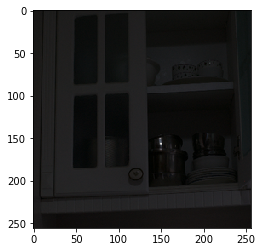

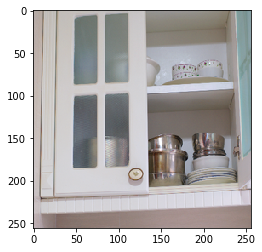

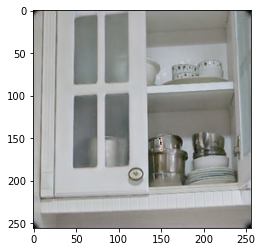

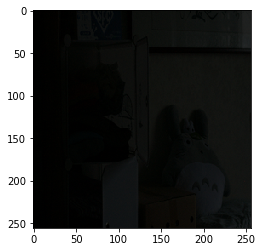

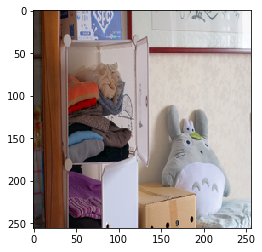

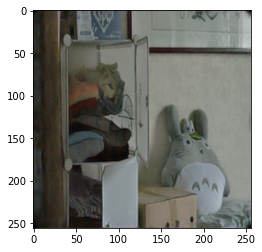

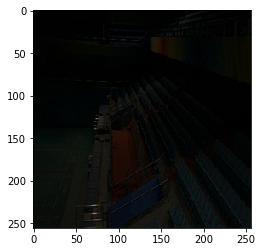

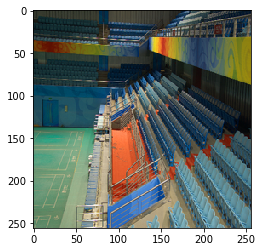

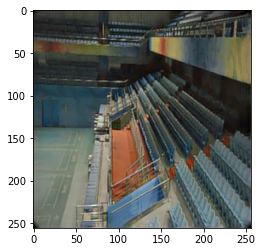

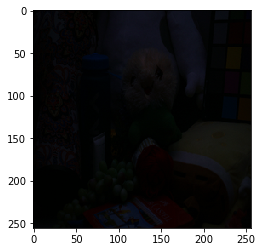

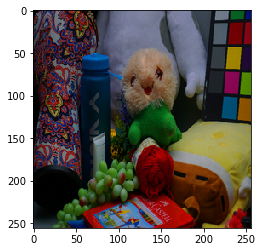

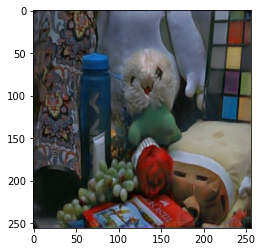

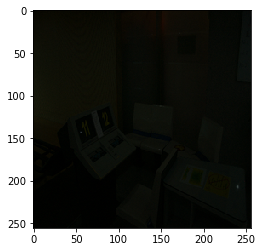

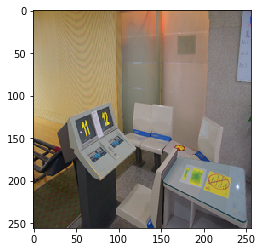

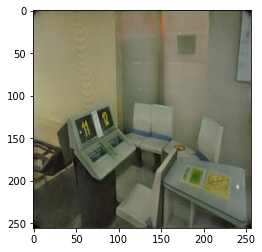

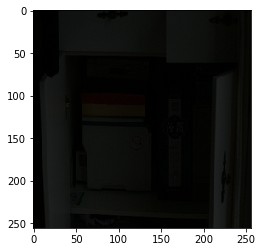

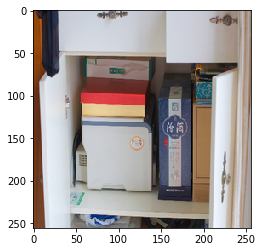

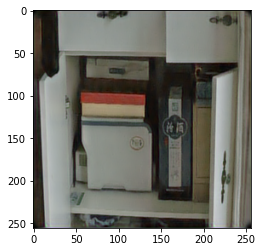

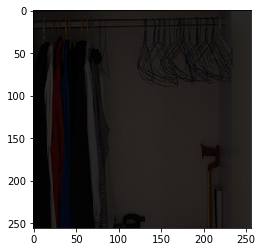

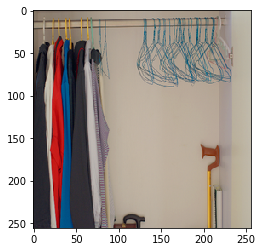

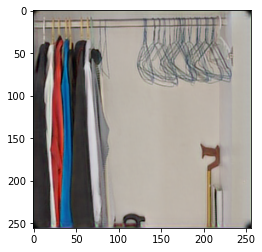

In [113]:
for i in [2,4,6,8,10,12,14]:
    plt.imshow(testX[i,:,:,:], interpolation='nearest')
    plt.show()
    plt.imshow(testY[i,:,:,:], interpolation='nearest')
    plt.show()
    formatted = (yhat[i,:,:,:] * 255 / np.max(yhat[5,:,:,:])).astype('uint8')
    img = Image.fromarray(formatted)
    plt.imshow(img)
    plt.show()

In [115]:
yhat_rescaled = (yhat * 255 / np.max(yhat))
testY_rescaled = (testY).astype('float32')

In [116]:
print('MAE = {}'.format(bright_mae(testY , yhat)))
print('PSNR = {}'.format(bright_psnr(testY , yhat)))
print('SSIM = {}'.format(np.mean(bright_SSIM((testY_rescaled),(yhat_rescaled)))))

MAE = 25.256683349609375
PSNR = -30.41332244873047
SSIM = 0.6036599278450012
